Loading preprocessed balanced dataset...
Splitting the dataset into training and testing sets...
Training the MLP model...
Calculating precision, recall, F1 score, and confusion matrix for the model...
Precision: 99.12%
Recall: 99.12%
F1 Score: 99.12%
Plotting confusion matrix...


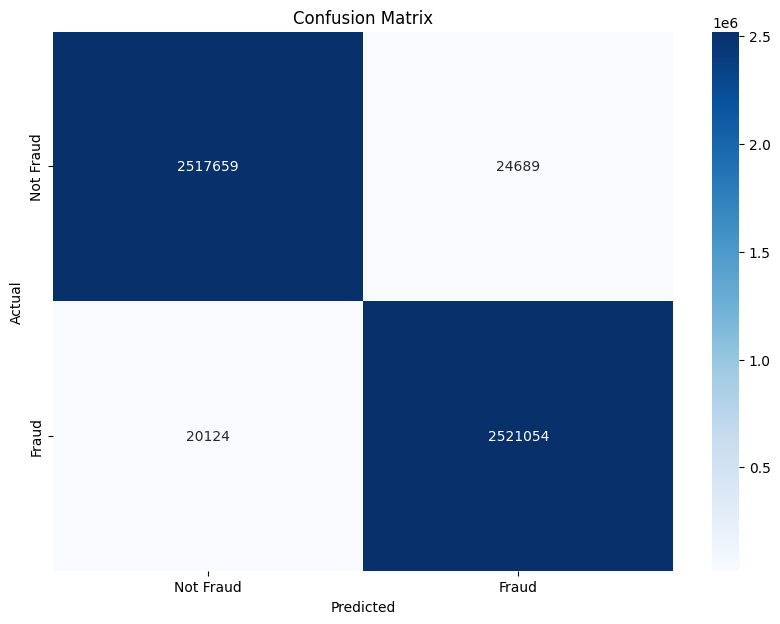

Saving the model to a file...
Model saved successfully.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed balanced dataset
print("Loading preprocessed balanced dataset...")
preprocessed_df = pd.read_csv('/content/drive/MyDrive/preprocessed_data_balanced.csv')  # Update the file path accordingly

# Features and target variable
X = preprocessed_df.drop(columns=['isFraud'])
y = preprocessed_df['isFraud']

# Split the dataset into training and testing sets
print("Splitting the dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=75)

# Train an MLP model
print("Training the MLP model...")
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
print("Calculating precision, recall, F1 score, and confusion matrix for the model...")
y_pred = mlp.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Plot confusion matrix
print("Plotting confusion matrix...")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the model to a file
print("Saving the model to a file...")
with open('mlp_numeric.pkl', 'wb') as f:
    pickle.dump(mlp, f)

print("Model saved successfully.")
